In [8]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(7)
#데이터 로딩, 시작36행은 건너뜀
data=np.genfromtxt("c:/data/regression/x09.txt",skip_header=36)
data[:10]

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.]])

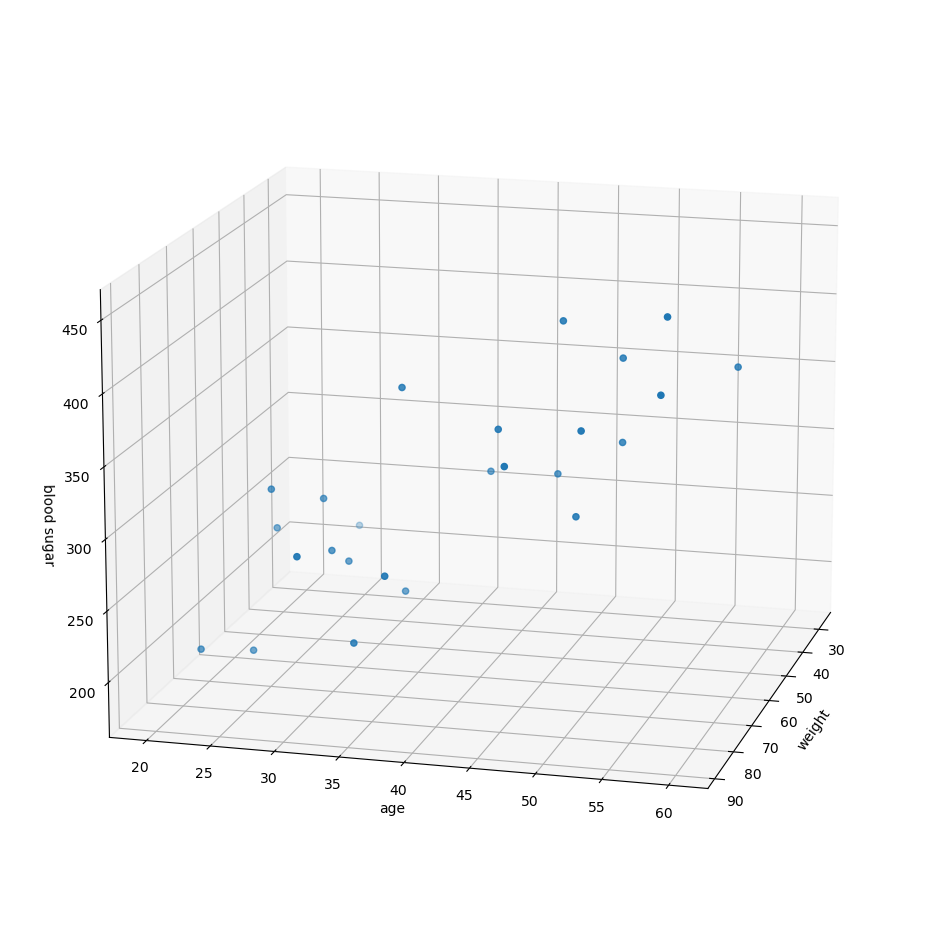

In [6]:
from mpl_toolkits.mplot3d import Axes3D
xdata=np.array(data[:,2],dtype=np.float32)
ydata=np.array(data[:,3],dtype=np.float32)
zdata=np.array(data[:,4],dtype=np.float32)
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15,15) #출력 각도 설정
plt.show()

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
#데이터를 케라스에 맞게 변환
#독립변수
x_data=np.array(data[:,2:4],dtype=np.float32)
#종속변수
y_data=np.array(data[:,4],dtype=np.float32)
#회귀분석 모델 생성
model=Sequential()
model.add(Dense(1,input_shape=(2,)))
rmsprop=RMSprop(learning_rate=0.01) #학습률 0.01: 미분을 얼마나 자세하게 할 지
model.compile(loss='mse',optimizer=rmsprop)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


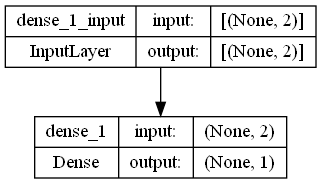

In [18]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [10]:
hist=model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 59099.7188
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 57453.3398
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 56282.4961
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 55316.0000
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 54468.1602
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 53699.3047
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 52987.3789
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 52318.6719
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 51684.0195
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 51076.9688
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 50492.7812
Epoch 12/1000
1/1 [==============================] - 0s 6ms/step - loss: 49927.8516
Ep

In [11]:
print(hist.history.keys())

dict_keys(['loss'])


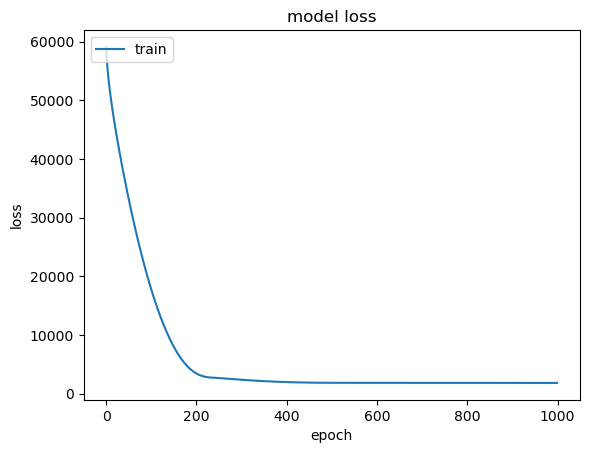

In [12]:
plt.plot(hist.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"],loc="upper left")
plt.show()

In [13]:
#새로운 데이터로 예측
#체중 100kg, 40세
#1차원 배열을 1행 2열의 2차원 배열로 변환
model.predict(np.array([100,40]).reshape(1,2))

1/1 [==============================] - 0s 88ms/step


array([[351.92337]], dtype=float32)

In [14]:
#체중 60kg, 25세
model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 25ms/step


array([[220.45499]], dtype=float32)

In [15]:
#회귀선을 그리기 위한 작업
#가중치와 절편,편향(bias)
w, b =model.get_weights()
w, b

(array([[1.2041247],
        [5.55356  ]], dtype=float32),
 array([9.368508], dtype=float32))

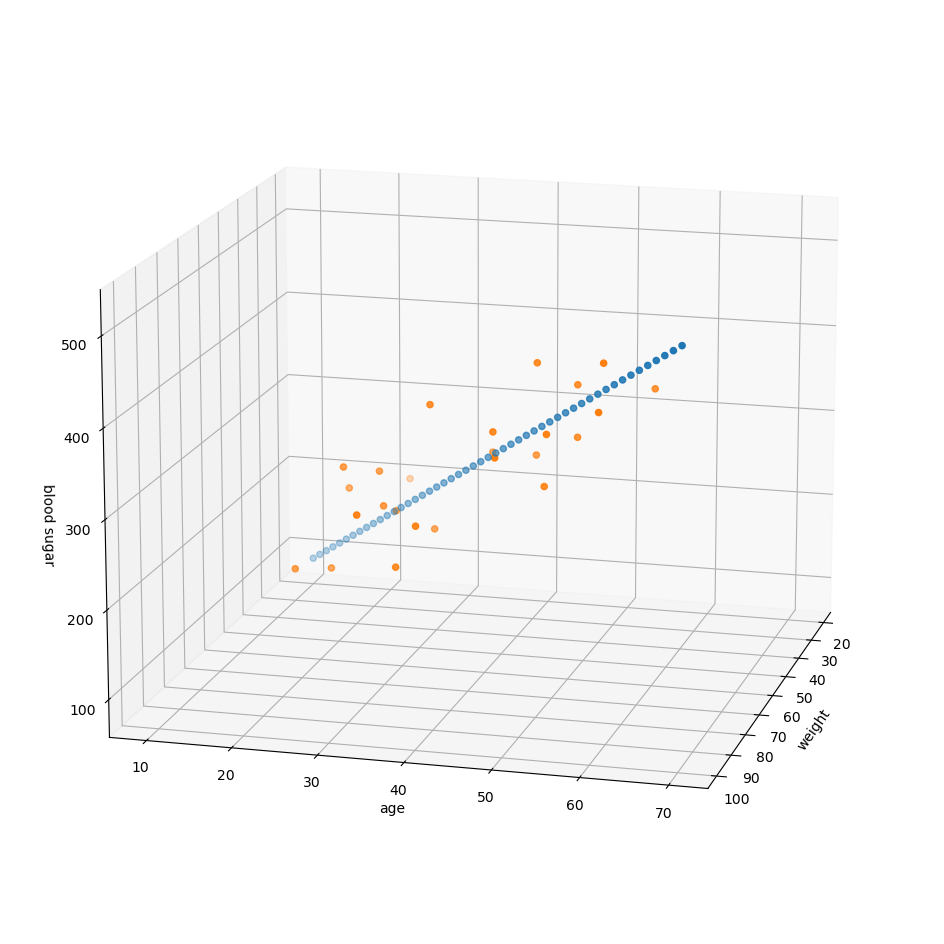

In [16]:
# linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
# start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를생성하고 배열을 만드는 함수
x=np.linspace(20,100,50).reshape(50,1)
y=np.linspace(10,70,50).reshape(50,1)
x2=np.concatenate((x,y),axis=1) #x,y연결
#행렬곱셈
z=np.matmul(x2,w)+b
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
#회귀선
ax.scatter(x,y,z)
#산점도
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15,15)
plt.show()